In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures 类的作用就是将原始特征转换为高次的多项式特征。它可以通过设置特定的阶数来生成不同阶数的多项式特征。

## 1 回归
◄ sklearn.linear_model.LinearRegression 线性回归模型类，用于建立和训练线性回归模型
◄ sklearn.preprocessing.PolynomialFeatures 特征预处理类，用于生成多项式特征，将原始特征的幂次组合以扩展特征空间，用于捕捉更复杂的非线性特征关系


### 1.1 聊聊回归

### 1.2 一元线性回归

(-2.0, 8.0)

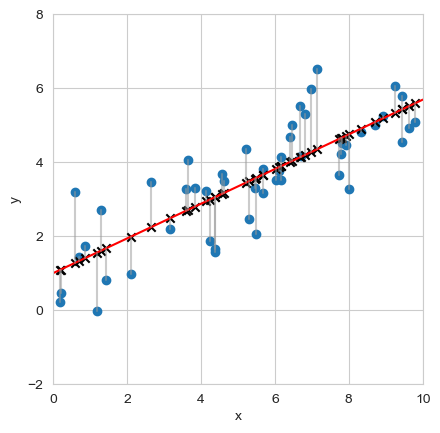

In [2]:
# 生成随机数据
num = 50
np.random.seed(0)
x_data = np.random.uniform(0, 10, num)  # 均匀分布
y_data = 0.5 * x_data + 1 + np.random.normal(0, 1, num)  # 正态分布 
x_data = x_data.reshape((-1, 1))
# 将x调整为列向量
data = np.column_stack([x_data, y_data])
# 创建回归对象并进行拟合
LR = LinearRegression()
# 使用LinearRegression()构建了一个线性回归模型
LR.fit(x_data, y_data)
slope = LR.coef_  # 获取回归模型的洗漱 斜率
intercept = LR.intercept_  # 获取回归模型的截距
x_array = np.linspace(0, 10, 101).reshape((-1, 1))
# 预测
predicted = LR.predict(x_array)
data_ = np.column_stack([x_data, LR.predict(x_data)])
fig, ax = plt.subplots()
ax.scatter(x_data, y_data)  # 真实数据散点图
ax.scatter(x_data, LR.predict(x_data), color='k', marker='x')  # 预测数据散点图
ax.plot(x_array, predicted, color='r')  # 绘制直线
ax.plot(([i for (i, j) in data_], [i for (i, j) in data]),  # 绘制残差 先是横坐标的变化 再是纵坐标的变化
        ([j for (i, j) in data_], [j for (i, j) in data]),
        c=[0.6, 0.6, 0.6], alpha=0.5)
ax.set_xlabel('x');
ax.set_ylabel('y')
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, 10);
ax.set_ylim(-2, 8)

### 1.3 二元线性回归

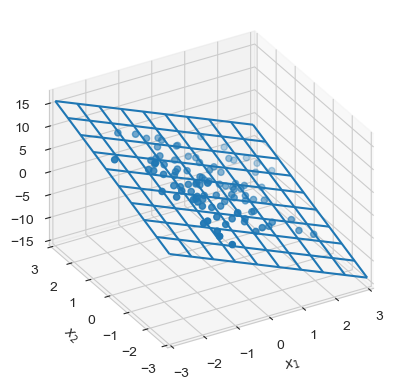

In [3]:
# 随机生成数据集
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)  # 标准正态分布
y = -3 * X[:, 0] + 2 * X[:, 1] + 1 + 0.5 * np.random.randn(n_samples)
# 创建线性回归模型并拟合数据
LR = LinearRegression()
LR.fit(X, y)
slope = LR.coef_  # 斜率 
intercept = LR.intercept_  # 截距

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 绘制三维样本散点
ax.scatter(X[:, 0], X[:, 1], y)
# 生成回归平面的数据点
x1_grid, x2_grid = np.meshgrid(np.linspace(-3, 3, 10),
                               np.linspace(-3, 3, 10))
X_grid = np.column_stack((x1_grid.flatten(), x2_grid.flatten()))  # 将两个一维数组按列堆叠在一起，形成二维数组，代表坐标
# 预测回归平面上的响应变量
y_pred = LR.predict(X_grid)
y_pred = y_pred.reshape(x1_grid.shape)
# 绘制回归平面
ax.plot_wireframe(x1_grid, x2_grid, y_pred)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('y')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_proj_type('ortho')
ax.view_init(azim=-120, elev=30)

### 1.4 多项式回归

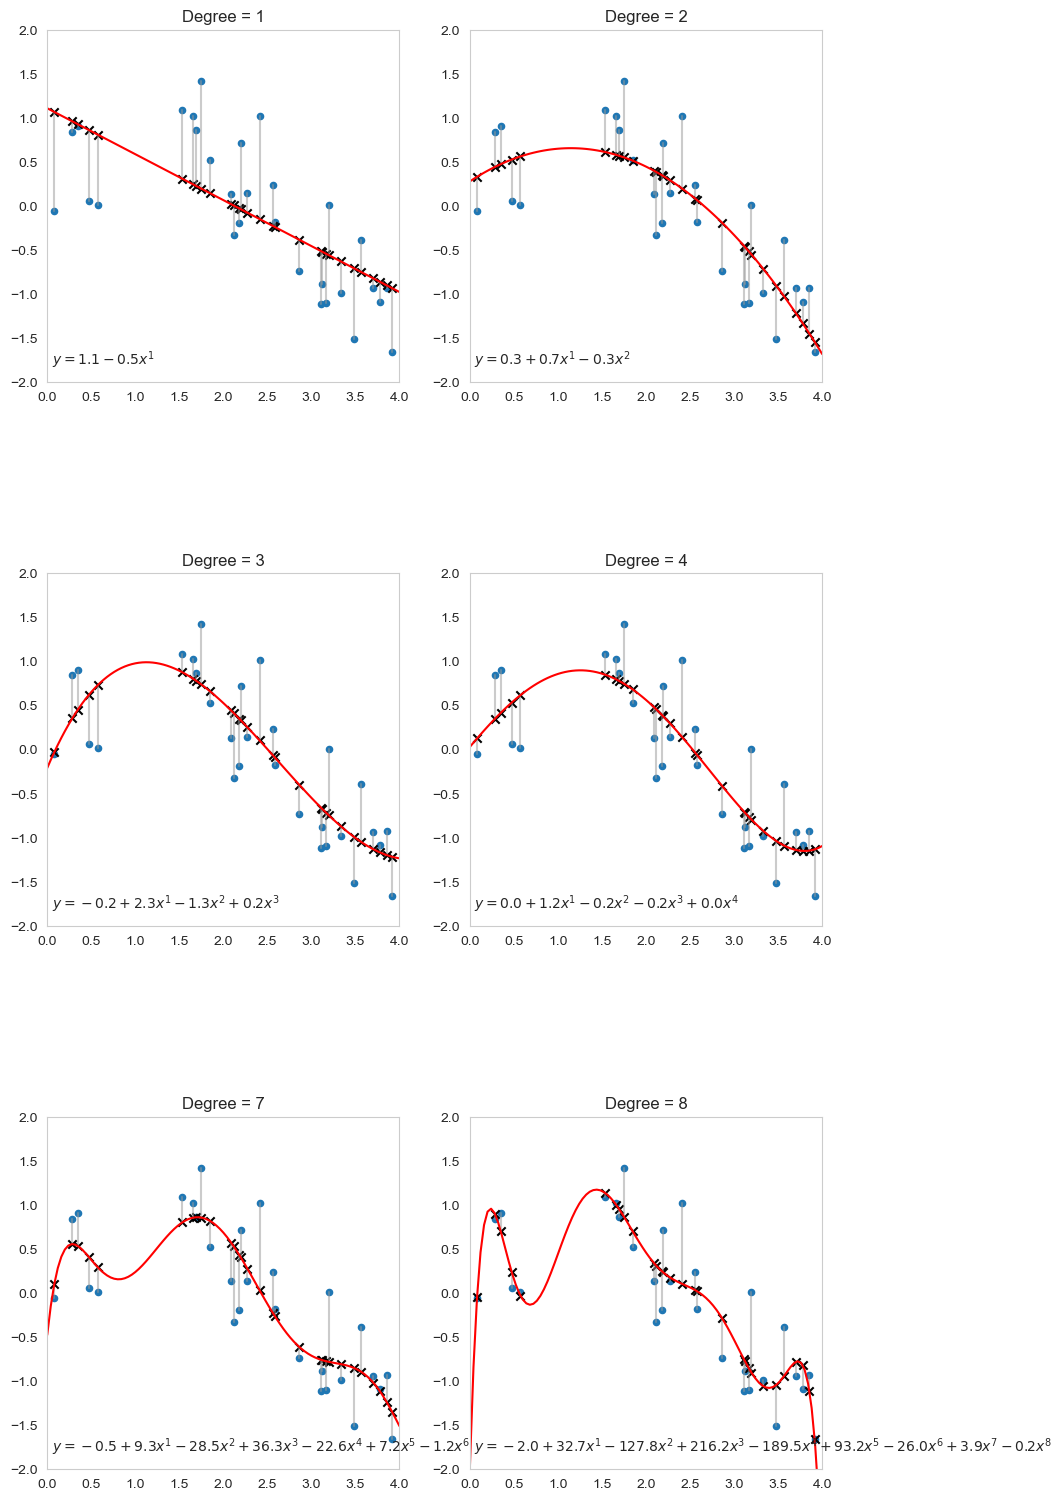

In [4]:
# 生成随机数据
np.random.seed(0)
num = 30
X = np.random.uniform(0, 4, num)  # 正态分布
y = np.sin(0.4 * np.pi * X) + 0.4 * np.random.randn(num)
data = np.column_stack([X, y])  # 真实数据
degree_array = [1, 2, 3, 4, 7, 8]  # 指定的多项式回归阶数
x_array = np.linspace(0, 4, 101).reshape(-1, 1)  # x坐标 用来绘制直线

fig, axes = plt.subplots(3, 2, figsize=(10, 20))
axes = axes.flatten()
for ax, degree_idx in zip(axes, degree_array):
    poly = PolynomialFeatures(degree=degree_idx)  # 用 PolynomialFeatures 将原始特征转换为高次的多项式特征， degree 决定了生成的多项式回归的最高阶数
    X_poly = poly.fit_transform(X.reshape(-1, 1))  # fit_transform 方法接受的输入应该是一个二维数组，中每行代表一个样本，每列代表一个特征。

    # 训练线性回归模型
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_poly_pred = poly_reg.predict(X_poly)
    data_ = np.column_stack([X, y_poly_pred])  # 拟合数据

    y_array_pred = poly_reg.predict(poly.fit_transform(x_array))  # 回归线

    # 绘制散点图
    ax.scatter(X, y, s=20)
    ax.scatter(X, y_poly_pred, marker='x', color='k')

    ax.plot(([i for (i, j) in data_], [i for (i, j) in data]),  # 残差绘制
            ([j for (i, j) in data_], [j for (i, j) in data]),
            c=[0.6, 0.6, 0.6], alpha=0.5)

    # 回归线
    ax.plot(x_array, y_array_pred, color='r')
    ax.set_title('Degree = %d' % degree_idx)

    # 提取参数
    coef = poly_reg.coef_  # 斜率
    intercept = poly_reg.intercept_  # 截距
    # 回归解析式
    equation = '$y = {:.1f}'.format(intercept)
    for j in range(1, len(coef)):
        equation += ' + {:.1f}x^{}'.format(coef[j], j)
    equation += '$'
    equation = equation.replace("+ -", "-")
    ax.text(0.05, -1.8, equation)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, 4)
    ax.grid(False)
    ax.set_ylim(-2, 2)


### 1.5 正则化：抑制过度拟合
► L2 正则化，也叫岭 (ridge) 正则化。有助于减小模型参数的大小。图 15 所示为岭正则化原理。
► L1 正则化，也叫套索 (Lasso) 正则化。可以将某些模型参数缩减为零。
► 弹性网络 (elastic net) 结合了 L2 正则化和 L1 正则化，它同时考虑两种正则化的效果。

$y = -0.985 + 18.399x^1 -71.750x^2 + 122.611x^3 -108.323x^4 + 53.620x^5 -15.058x^6 + 2.243x^7 -0.138x^8$
$y = 0.026 + 3.491x^1 -13.188x^2 + 24.668x^3 -23.210x^4 + 12.008x^5 -3.515x^6 + 0.547x^7 -0.035x^8$
$y = 0.222 + 0.380x^1 + 0.149x^2 + 0.258x^3 -0.391x^4 + 0.203x^5 -0.093x^6 + 0.027x^7 -0.003x^8$
$y = 0.335 + 0.125x^1 + 0.132x^2 + 0.099x^3 + 0.019x^4 -0.048x^5 -0.033x^6 + 0.022x^7 -0.003x^8$
$y = 0.428 + 0.045x^1 + 0.064x^2 + 0.070x^3 + 0.049x^4 -0.008x^5 -0.065x^6 + 0.030x^7 -0.004x^8$
$y = 0.585 + 0.013x^1 + 0.020x^2 + 0.024x^3 + 0.019x^4 -0.004x^5 -0.029x^6 + 0.013x^7 -0.002x^8$


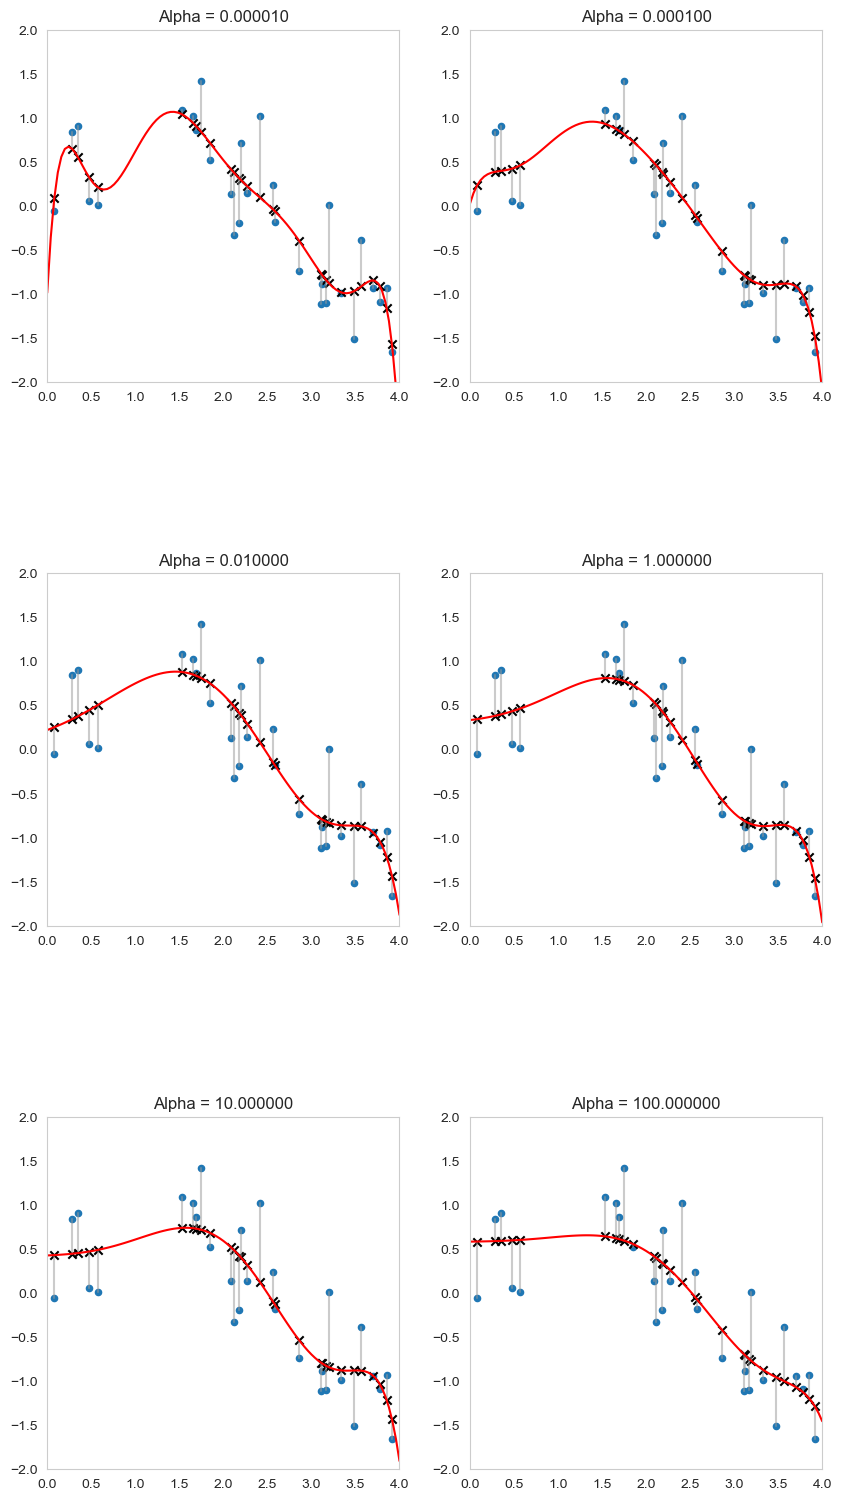

In [5]:
from sklearn.linear_model import Ridge  # 岭回归

# 生成随机数据
np.random.seed(0)
num = 30
X = np.random.uniform(0, 4, num)
y = np.sin(0.4 * np.pi * X) + 0.4 * np.random.randn(num)
data = np.column_stack([X, y])  # 真实数据
x_array = np.linspace(0, 4, 101).reshape(-1, 1)  # x 坐标
degree = 8  # 多项式回归次数
# 将数据扩展为9列
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X.reshape(-1, 1))

fig, axes = plt.subplots(3, 2, figsize=(10, 20))
axes = axes.flatten()
# 惩罚因子
alpha_array = [0.00001, 0.0001, 0.01, 1, 10, 100]
for ax, alpha_idx in zip(axes, alpha_array):
    # 训练岭回归模型
    ridge = Ridge(alpha=alpha_idx)
    ridge.fit(X_poly, y.reshape(-1, 1))
    # 预测
    y_array_pred = ridge.predict(poly.fit_transform(x_array))
    y_poly_pred = ridge.predict(X_poly)
    data_ = np.column_stack([X, y_poly_pred])  # 拟合数据
    # 绘制散点图
    ax.scatter(X, y, s=20)
    ax.scatter(X, y_poly_pred, marker='x', color='k')
    # 绘制残差
    ax.plot(([i for (i, j) in data_], [i for (i, j) in data]),
            ([j for (i, j) in data_], [j for (i, j) in data]),
            c=[0.6, 0.6, 0.6], alpha=0.5)

    ax.plot(x_array, y_array_pred, color='r')
    ax.set_title('Alpha = %f' % alpha_idx)

    # 提取参数
    coef = ridge.coef_[0];  # print(coef)
    intercept = ridge.intercept_[0];  # print(intercept)
    # 回归解析式
    equation = '$y = {:.3f}'.format(intercept)
    for j in range(1, len(coef)):
        equation += ' + {:.3f}x^{}'.format(coef[j], j)
    equation += '$'
    equation = equation.replace("+ -", "-")
    print(equation)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, 4);
    ax.set_ylim(-2, 2);
    ax.grid(False)

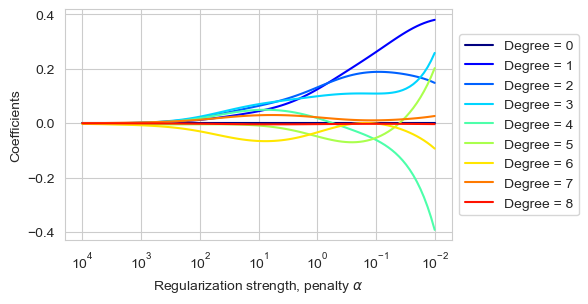

In [6]:
# 多项式回归模型参数随惩罚因子α变化
alphas = np.logspace(4, -2, 100)
degrees = ['Degree = ' + str(d_i) for d_i in range(10)]  # 表生成式创建一组图例标签
colors = plt.cm.jet(np.linspace(0, 1, len(degrees)))
# 首先 np.linspace(0, 1, len(degrees)) 生成一个0到1等差数列，与degrees中元素个数相同。用 plt.cm.jet 将上述0到1的数映射为一组颜色。colors 为与 degrees 相关联的一组颜色数组 

coefs = []
for alpha_idx in alphas:
    ridge = Ridge(alpha=alpha_idx)
    ridge.fit(X_poly, y.reshape(-1, 1))
    coefs.append(ridge.coef_[0])
coefs = np.array(coefs)
fig, ax = plt.subplots(figsize=(5, 3))
for idx in range(9):
    ax.plot(alphas, coefs[:, idx], color=colors[idx])
ax.set_xscale("log")  # 将 ax 的横轴刻度设置为对数刻度
ax.set_xlim(ax.get_xlim()[::-1])  # 调转横轴
ax.set_xlabel(r"Regularization strength, penalty $\alpha$")
ax.set_ylabel("Coefficients")
ax.legend(degrees, loc='center left', bbox_to_anchor=(1, 0.5))  # 控制图例的相对位置

## 2 Scikit-Learn 降维
◄ sklearn.preprocessing.StandardScaler() 用于对数据进行标准化处理
◄ sklearn.decomposition.PCA() 执行主成分分析 PCA 以减少数据维度
◄ sklearn.covariance.EmpiricalCovariance() 计算基于样本的经验协方差矩阵

### 2.1 降维
维度诅咒 (curse of dimensionality) 用来描述数据特征 (维度) 增加时，数据特征空间体积指数增大。

### 2.2 主成分分析
PCA 是一种线性降维方法，它只能捕捉数据中的线性相关性。如果数据具有复杂的非线性关系，PCA 可能无法很好地捕捉这些模式，从而导致信息丢失。
核主成分分析 (Kernel Principal Component Analysis)，也叫核 PCA，在高维特征空间中使用核技巧 (kernel trick) 来进行 PCA，从而能够处理非线性关系。

### 2.3 两特征 PCA


In [7]:
from sklearn.preprocessing import StandardScaler
import pandas_datareader as pdr
# 需要先安装库 pip install pandas_datareader
import seaborn as sns

# 下载数据，两个 tenors
df = pdr.data.DataReader(['DGS6MO', 'DGS1'],
                         data_source='fred',
                         start='01-01-2022',
                         end='12-31-2022')
df = df.dropna()
# 修改数据帧的column names
df = df.rename(columns={'DGS6MO': 'X1',
                        'DGS1': 'X2'})
# 计算日收益率 
X_df = df.pct_change()
# 删除缺失值
X_df = X_df.dropna()
# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

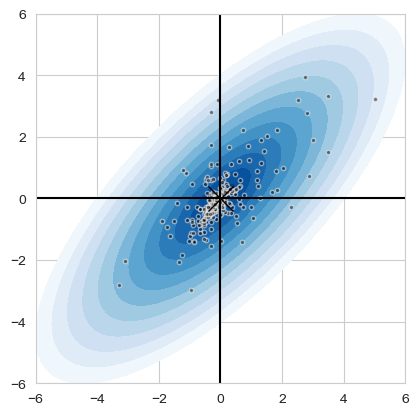

In [8]:
from sklearn.covariance import EmpiricalCovariance

x1_array = np.linspace(-6, 6, 601)
x2_array = np.linspace(-6, 6, 601)
xx1, xx2 = np.meshgrid(x1_array, x2_array)  # 生成 x 坐标， y 坐标
xx12 = np.c_[xx1.ravel(), xx2.ravel()]  # # np.c_() 按列连接 np.ravel() 将多维数组变为一维数组 生成坐标点
# 加载学习样本数据
COV = EmpiricalCovariance().fit(X_scaled)
# 计算网格化数据的马氏距离
mahal_sq_Xc = COV.mahalanobis(xx12)  # 输出结果为马氏距离的平方
mahal_sq_dd = mahal_sq_Xc.reshape(xx1.shape)
mahal_dd = np.sqrt(mahal_sq_dd)  # 开方得到马氏距离
fig, ax = plt.subplots()
# 绘制马氏距离填充等高线
plt.contourf(xx1, xx2, mahal_dd,
             cmap='Blues_r', levels=np.linspace(0, 6, 13))
# 绘制样本数据 (标准化) 散点图
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            s=38, edgecolor='w', alpha=0.5,
            marker='.', color='k')
# 绘制样本数据质心
plt.plot(X_scaled[:, 0].mean(), X_scaled[:, 1].mean(),
         marker='x', color='k', markersize=18)
ax.axvline(x=0, c='k');
ax.axhline(y=0, c='k')
ax.grid('off');
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6)
ax.set_ybound(lower=-6, upper=6)

In [9]:
from sklearn.decomposition import PCA

# 主成分分析
# 主成分数量设定为2
pca = PCA(n_components=2)
# 拟合PCA模型
pca.fit(X_scaled)
# 获取loadings（主成分方向向量）
loadings = pca.components_.T
V = loadings
print(np.round(V.T @ V))
print(np.round(V @ V.T))
v1 = V[:, [0]]  # 第一主成分方向
v2 = V[:, [1]]  # 第二主成分方向
v1, v2

[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


(array([[0.70710678],
        [0.70710678]]),
 array([[-0.70710678],
        [ 0.70710678]]))

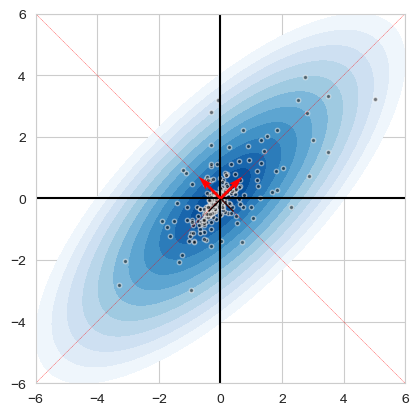

In [10]:
# 自定义绘制向量函数
def draw_vector(vector, RBG):
    array = np.array([[0, 0, vector[0], vector[1]]], dtype=object)
    X, Y, U, V = zip(*array)
    plt.quiver(X, Y, U, V, angles='xy',
               scale_units='xy', scale=1, color=RBG,
               zorder=1e5)


fig, ax = plt.subplots()
# 绘制马氏距离等高线
plt.contourf(xx1, xx2, mahal_dd,
             cmap='Blues_r', levels=np.linspace(0, 6, 13))
# 绘制标准化数据散点图
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
            s=38, edgecolor='w', alpha=0.5,
            marker='.', color='k')
# 绘制质心
plt.plot(X_scaled[:, 0].mean(), X_scaled[:, 1].mean(),
         marker='x', color='k', markersize=18)
# 可视化两个主成分方向
draw_vector(v1, 'r')
draw_vector(v2, 'r')
# 绘制两条参考线
ax.plot(x1_array, x1_array * v1[1] / v1[0], 'r',
        lw=0.25, ls='dashed')
ax.plot(x1_array, x1_array * v2[1] / v2[0], 'r',
        lw=0.25, ls='dashed')
ax.axvline(x=0, c='k');
ax.axhline(y=0, c='k')
ax.grid('off')
ax.set_aspect('equal', adjustable='box')
ax.set_xbound(lower=-6, upper=6)
ax.set_ybound(lower=-6, upper=6)

### 2.4 三特征 PCA

## 3 Scikit-Learn 分类
◄ matplotlib.colors.ListedColormap() 创建离散颜色映射的函数。函数接受一个颜色列表作为输入，并生成一个离散的颜色映射对象，用于在可视化中区分不同的类别或数据值
◄ sklearn.datasets.load_iris() 加载鸢尾花数据
◄ sklearn.naive_bayes.GaussianNB() 实现高斯朴素贝叶斯分类器算法
◄ sklearn.neighbors.KNeighborsClassifier() 实现 k 最近邻分类器算法
◄ sklearn.svm.SVC() 实现支持向量机分类器算法

### 3.1 什么是分类？

### 3.2 k 最近邻分类：近朱者赤，近墨者黑


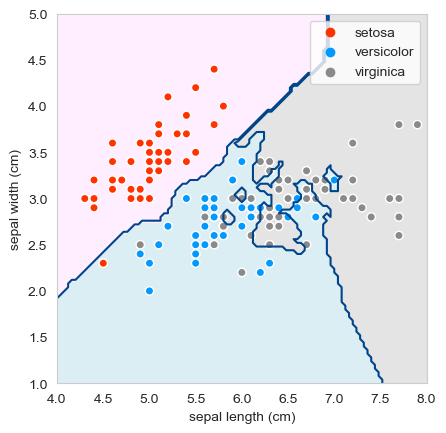

In [11]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# 导入并整理数据
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
# 生成网格化数据
x1_array = np.linspace(4, 8, 101)
x2_array = np.linspace(1, 5, 101)
xx1, xx2 = np.meshgrid(x1_array, x2_array)
# 创建色谱
rgb = [[255, 238, 255],
       [219, 238, 244],
       [228, 228, 228]]
rgb = np.array(rgb) / 255.
cmap_light = ListedColormap(rgb)
cmap_bold = [[255, 51, 0],
             [0, 153, 255],
             [138, 138, 138]]
cmap_bold = np.array(cmap_bold) / 255.
k_neighbors = 4  # 定义kNN近邻数量k
# 创建kNN分类器对象
kNN = neighbors.KNeighborsClassifier(k_neighbors)
kNN.fit(X, y)  # 用训练数据训练kNN
q = np.c_[xx1.ravel(), xx2.ravel()]  # 查询点
# 用kNN对一系列查询点进行预测
y_predict = kNN.predict(q)
y_predict = y_predict.reshape(xx1.shape)
# 可视化
fig, ax = plt.subplots()
plt.contourf(xx1, xx2, y_predict, cmap=cmap_light)  # 绘制分类区域
plt.contour(xx1, xx2, y_predict, levels=[0, 1, 2],  # 绘制分类决策边界
            colors=np.array([0, 68, 138]) / 255.)
sns.scatterplot(x=X[:, 0], y=X[:, 1],
                hue=iris.target_names[y],
                ax=ax,
                palette=dict(setosa=cmap_bold[0, :],
                             versicolor=cmap_bold[1, :],
                             virginica=cmap_bold[2, :]),
                alpha=1.0,
                linewidth=1, edgecolor=[1, 1, 1])
plt.xlim(4, 8);
plt.ylim(1, 5)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25,
        color=[0.5, 0.5, 0.5])
ax.set_aspect('equal', adjustable='box')

### 3.3 高斯朴素贝叶斯分类：贝叶斯定理的应用

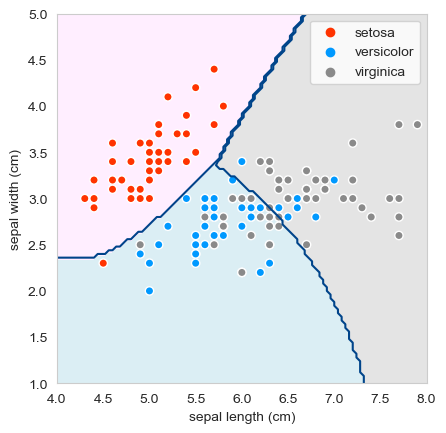

In [12]:
from sklearn.naive_bayes import GaussianNB

# 创建高斯朴素贝叶斯分类器对象
gnb = GaussianNB()
# 用训练数据训练kNN
gnb.fit(X, y)
# 用高斯朴素贝叶斯分类器对一系列查询点进行预测
y_predict_G = gnb.predict(q)
y_predict_G = y_predict_G.reshape(xx1.shape)
# 可视化
fig, ax = plt.subplots()
plt.contourf(xx1, xx2, y_predict_G, cmap=cmap_light)  # 绘制分类区域
plt.contour(xx1, xx2, y_predict_G, levels=[0, 1, 2],  # 绘制分类决策边界
            colors=np.array([0, 68, 138]) / 255.)
sns.scatterplot(x=X[:, 0], y=X[:, 1],
                hue=iris.target_names[y],
                ax=ax,
                palette=dict(setosa=cmap_bold[0, :],
                             versicolor=cmap_bold[1, :],
                             virginica=cmap_bold[2, :]),
                alpha=1.0,
                linewidth=1, edgecolor=[1, 1, 1])
plt.xlim(4, 8);
plt.ylim(1, 5)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25,
        color=[0.5, 0.5, 0.5])
ax.set_aspect('equal', adjustable='box')

### 3.4 支持向量机：间隔最大化

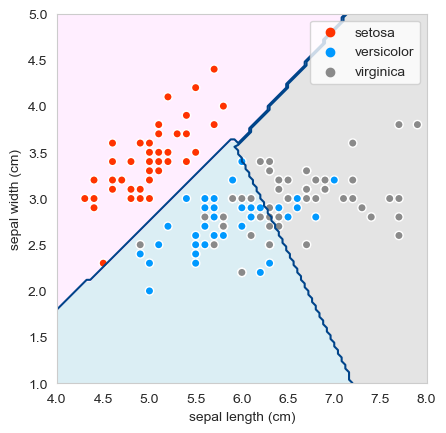

In [13]:
from sklearn import svm

# 创建支持向量机 (线性核) 分类器对象
SVM = svm.SVC(kernel='linear')
# 用训练数据训练kNN
SVM.fit(X, y)
# 用支持向量机 (线性核) 分类器对一系列查询点进行预测
y_predict_SVM = SVM.predict(q)
y_predict_SVM = y_predict_SVM.reshape(xx1.shape)
# 可视化
fig, ax = plt.subplots()
plt.contourf(xx1, xx2, y_predict_SVM, cmap=cmap_light)  # 绘制分类区域
plt.contour(xx1, xx2, y_predict_SVM, levels=[0, 1, 2],  # 绘制分类决策边界
            colors=np.array([0, 68, 138]) / 255.)
sns.scatterplot(x=X[:, 0], y=X[:, 1],
                hue=iris.target_names[y],
                ax=ax,
                palette=dict(setosa=cmap_bold[0, :],
                             versicolor=cmap_bold[1, :],
                             virginica=cmap_bold[2, :]),
                alpha=1.0,
                linewidth=1, edgecolor=[1, 1, 1])
plt.xlim(4, 8);
plt.ylim(1, 5)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25,
        color=[0.5, 0.5, 0.5])
ax.set_aspect('equal', adjustable='box')

### 3.5 核技巧：数据映射到高维空间

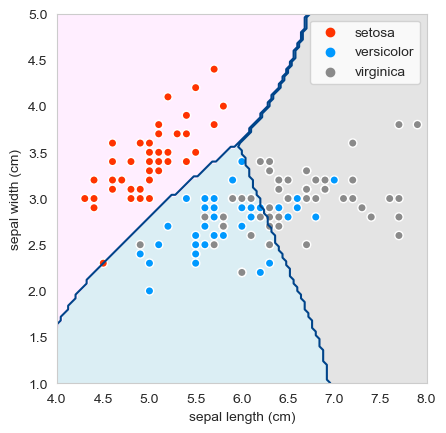

In [14]:
# 创建支持向量机 (高斯核) 分类器对象
SVM = svm.SVC(kernel='rbf', gamma='auto')
# 用训练数据训练kNN
SVM.fit(X, y)
# 用支持向量机 (线性核) 分类器对一系列查询点进行预测
y_predict_kernel = SVM.predict(q)
y_predict_kernel = y_predict_kernel.reshape(xx1.shape)
# 可视化
fig, ax = plt.subplots()
plt.contourf(xx1, xx2, y_predict_kernel, cmap=cmap_light)  # 绘制分类区域
plt.contour(xx1, xx2, y_predict_kernel, levels=[0, 1, 2],  # 绘制分类决策边界
            colors=np.array([0, 68, 138]) / 255.)
sns.scatterplot(x=X[:, 0], y=X[:, 1],
                hue=iris.target_names[y],
                ax=ax,
                palette=dict(setosa=cmap_bold[0, :],
                             versicolor=cmap_bold[1, :],
                             virginica=cmap_bold[2, :]),
                alpha=1.0,
                linewidth=1, edgecolor=[1, 1, 1])
plt.xlim(4, 8);
plt.ylim(1, 5)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25,
        color=[0.5, 0.5, 0.5])
ax.set_aspect('equal', adjustable='box')

## 4 Scikit-Learn聚类
◄ matplotlib.patches.Ellipse() 创建并绘制椭圆形状的图形对象
◄ matplotlib.pyplot.quiver() 绘制向量箭头
◄ numpy.arctan2() 计算反正切，返回弧度值
◄ numpy.linalg.svd() 完成奇异值分解
◄ numpy.sqrt() 计算平方根
◄ sklearn.cluster.KMeans() 执行 K 均值聚类算法，将数据点划分成预定数量的簇
◄ sklearn.mixture.GaussianMixture() 用于拟合高斯混合模型，以对数据进行聚类和概率密度估计"

### 4.1 聚类

### 4.2 K 均值聚类

D:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


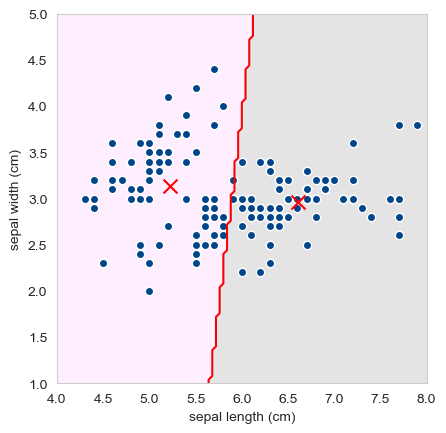

In [15]:
from sklearn.cluster import KMeans

# 聚类不需要标签
# 采用KMeans聚类
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(X)
# 预测聚类
Z = kmeans.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
fig, ax = plt.subplots()
ax.contourf(xx1, xx2, Z, cmap=cmap_light)  # 聚类区域
ax.scatter(x=X[:, 0], y=X[:, 1],
           color=np.array([0, 68, 138]) / 255.,
           alpha=1.0,
           linewidth=1, edgecolor=[1, 1, 1])
# 绘制决策边界
levels = np.unique(Z).tolist();
ax.contour(xx1, xx2, Z, levels=levels, colors='r')
centroids = kmeans.cluster_centers_  # 获取 KMeans 聚类算法拟合后得到的聚类质心的坐标。
ax.scatter(centroids[:, 0], centroids[:, 1],
           marker="x", s=100, linewidths=1.5,
           color="r")
ax.set_xlim(4, 8);
ax.set_ylim(1, 5)
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.grid(linestyle='--', linewidth=0.25,
        color=[0.5, 0.5, 0.5])
ax.set_aspect('equal', adjustable='box')

### 4.3 高斯混合模型

In [34]:
from matplotlib.patches import Ellipse

# 定义可视化函数
def make_ellipses(gmm, ax):
 
    # 可视化不同簇
    for j in range(0,K):
        # 四种不同的协方差矩阵
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[j]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[j])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1])
            covariances = covariances*gmm.covariances_[j]
 
        # 用奇异值分解完成特征值分解
        U, S, V_T = np.linalg.svd(covariances)
        # 计算长轴、短轴长度
        major, minor = 2 * np.sqrt(S)
 
        # 计算椭圆长轴旋转角度
        angle = np.arctan2(U[1,0], U[0,0])
        angle = 180 * angle / np.pi 
 
        # 多元高斯分布中心
        ax.plot(gmm.means_[j, 0],gmm.means_[j, 1],
                color = 'k',marker = 'x',markersize = 10)
        # 绘制半长轴向量
        ax.quiver(gmm.means_[j,0],gmm.means_[j,1],
                  U[0,0], U[1,0], scale = 5/minor)
        # 绘制半短轴向量
        ax.quiver(gmm.means_[j,0],gmm.means_[j,1],
                  U[0,1], U[1,1], scale = 5/major)
 
        # 绘制椭圆
        for scale in np.array([3, 2, 1]):
            ell = Ellipse(gmm.means_[j, :2],
                          scale*minor,
                          scale*major,
                          angle,
                          # color=rgb[j,:],
                          alpha = 0.18)
            ax.add_artist(ell)

D:\miniconda\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

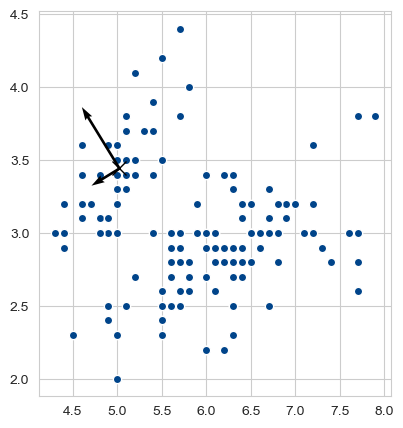

In [36]:
from sklearn.mixture import GaussianMixture

# 创建色谱
rgb = [[255, 51, 0],
       [0, 153, 255],
       [138, 138, 138]]
rgb = np.array(rgb) / 255.
cmap_bold = ListedColormap(rgb)
# 生成网格化数据
x1_array = np.linspace(4, 8, 101)
x2_array = np.linspace(1, 5, 101)
xx1, xx2 = np.meshgrid(x1_array, x2_array)
# 鸢尾花数据
iris = datasets.load_iris();
X = iris.data[:, :2]
K = 3  # 簇数
# 协方差类型
covariance_types = ['tied', 'spherical', 'diag', 'full']
for covariance_type in covariance_types:
    # 采用GMM聚类
    gmm = GaussianMixture(n_components=K,
                          covariance_type=covariance_type)
    gmm.fit(X)
    Z = gmm.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    # 可视化
    fig = plt.figure(figsize=(10, 5))
    # 左侧图片
    ax = fig.add_subplot(1, 2, 1)
    # 散点图 绘制数据点
    ax.scatter(x=X[:, 0], y=X[:, 1],
               color=np.array([0, 68, 138]) / 255.,
               alpha=1.0,
               linewidth=1, edgecolor=[1, 1, 1])
    # 绘制椭圆和向量
    make_ellipses(gmm, ax)
    ax.set_xlim(4, 8);
    ax.set_ylim(1, 5)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.grid(linestyle='--', linewidth=0.25,
            color=[0.5, 0.5, 0.5])
    ax.set_aspect('equal', adjustable='box')
    # 右侧图片
    ax = fig.add_subplot(1, 2, 2)
    # 绘制决策边界
    ax.contourf(xx1, xx2, Z, cmap=cmap_bold, alpha=0.18)
    # 绘制决策边界
    ax.contour(xx1, xx2, Z, levels=[0, 1, 2],
               colors=np.array([0, 68, 138]) / 255.)
    # 数据点
    ax.scatter(x=X[:, 0], y=X[:, 1],
               color=np.array([0, 68, 138]) / 255.,
               alpha=1.0,
               linewidth=1, edgecolor=[1, 1, 1])
    # 数据质心
    centroids = gmm.means_
    ax.scatter(centroids[:, 0], centroids[:, 1],
               marker="x", s=100, linewidths=1.5,
               color="k")
    ax.set_xlim(4, 8);
    ax.set_ylim(1, 5)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.grid(linestyle='--', linewidth=0.25,
            color=[0.5, 0.5, 0.5])
    ax.set_aspect('equal', adjustable='box')